<a href="https://colab.research.google.com/github/andressa2506/desafio-python/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS DO TITANIC

* Análise exploratória

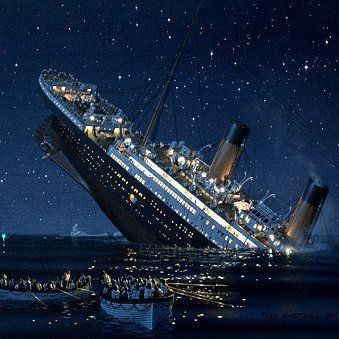




**Carregando as bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entendendo o dataset

Explorando e conhecendo a base de dados.
Vamos responder algumas perguntas:

Quantas pessoas tinham no titanic?

Qual o percentual de sobrevivência?

Qual a taxa de sobreviência entre homens e mulheres?

Qual a taxa de sobrevivência entre as classes?

In [6]:
df = pd.read_csv('/content/titanic_completa_oficial.csv', na_values='?')

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [18]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [10]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


**Descrição das colunas**

* pclass: classe da passagem (1: primeira classe, 2: segunda classe, 3 terceira classe)

* survived: sobrevivente (0 = não, 1 = sim)

* name: nome do passageiro

* sex: gênero do passageiro

* age: idade do passageiro

* sibsp: número de irmãos/ cônjuges a bordo

* parch: número de pais/filhos a bordo

* ticket: número do ticket/passagem

* fare: tarifa da passagem

* cabin: número da cabine

* embarked: porto de embarque(C= Chenbourg, Q = queenstown, S = Southampton)


**Excluindo algumas colunas que não são relevantes**

In [12]:
df = df.drop(['body', 'boat', 'home.dest'], axis=1)

In [13]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [19]:
df['pclass'].unique()

array([1, 2, 3])

In [21]:
df['pclass'].value_counts()  #Divisão entre as classes

,count
pclass,
3,709
1,323
2,277


In [23]:
(df['pclass'].value_counts(normalize=True))*100  #Percentual de classes

,proportion
pclass,
3,54.163484
1,24.675325
2,21.161192


In [20]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [22]:
df['sex'].value_counts()  #Divisão de homens e mulheres

,count
sex,
male,843
female,466


In [25]:
(df['sex'].value_counts(normalize=True))*100  #Percentual de homens e mulheres

,proportion
sex,
male,64.400306
female,35.599694


In [15]:
df['survived'].value_counts()   #Número de sobreviventes

,count
survived,
0,809
1,500


In [16]:
(df['survived'].value_counts(normalize=True))*100  #Taxa de sobrevivência

,proportion
survived,
0,61.802903
1,38.197097


* ***Qual é proporção de homens/mulheres que morreram/sobreviveram?***

In [29]:
df.query("sex == 'male'")["survived"].value_counts(normalize=True)  #Sobrevivência dos homens

,proportion
survived,
0,0.809015
1,0.190985


In [28]:
df.query("sex == 'female'")["survived"].value_counts(normalize=True) #Sobrevivência das mulheres

,proportion
survived,
1,0.727468
0,0.272532


# Analizando os dados podemos ter noção do tamanho dessa tragédia.

**Contagem:**

Ao total tinham 1309 pessoas a bordo do tinanic.

* 809 mortos
* 500 sobreviventes

466 pessoas do sexo feminino

846 pessoas do sexo masculino

**Porcentagem de sobrevivência por gênero**

* ***Homens:*** 80% faleceram, enquanto
  20% sobreviveram

* ***Mulheres:*** 27% faleceram, enquanto 72% sobreviveram


# Sobrevivência por classes

   Taxa de sobrevivência:

* 1 Classe:

  34% dos homens sobreviveram
  
  96% das mulheres sobreviveram

* 2 Classe:

  14% dos homens sobreviveram
  
  88% das mulheres sobreviveram

* 3 Classe:

  15% dos homens sobreviveram
  
  49% das mulheres sobreviveram

In [30]:
df.query("sex == 'male' and pclass == 1")["survived"].mean() #Média de sob. 1 classe (homens)

0.3407821229050279

In [31]:
df.query("sex == 'male' and pclass == 1")["survived"].value_counts()

,count
survived,
0,118
1,61


In [32]:
df.query("sex == 'male' and pclass == 2")["survived"].mean() #média de sob. 2 classe (homens)

0.14619883040935672

In [34]:
df.query("sex == 'male' and pclass == 2")["survived"].value_counts()

,count
survived,
0,146
1,25


In [35]:
df.query("sex == 'male' and pclass == 3")["survived"].mean()  #Média de sob. 3 classe (homens)

0.15212981744421908

In [36]:
df.query("sex == 'male' and pclass == 1")["survived"].value_counts()

,count
survived,
0,118
1,61


In [37]:
df.query("sex == 'female' and pclass == 1")["survived"].mean() #Média de sob. 1 classe (mulheres)

0.9652777777777778

In [39]:
df.query("sex == 'female' and pclass == 1")["survived"].value_counts()

,count
survived,
1,139
0,5


In [40]:
df.query("sex == 'female' and pclass == 2")["survived"].mean()  #Média de sob. 2 classe (mulheres)

0.8867924528301887

In [41]:
df.query("sex == 'female' and pclass == 2")["survived"].value_counts()

,count
survived,
1,94
0,12


In [42]:
df.query("sex == 'female' and pclass == 3")["survived"].mean()   #Média de sob. 3 classe (mulheres)

0.49074074074074076

In [44]:
df.query("sex == 'female' and pclass == 3")["survived"].value_counts()

,count
survived,
0,110
1,106


In [45]:
df.groupby(["pclass", "sex"])["survived"].mean()

pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
Name: survived, dtype: float64

In [46]:
df.groupby(["pclass", "sex"])[["survived"]].agg(["mean", "min", "max", "std"])

survived                  
                   mean min max       std
pclass sex                               
1      female  0.965278   0   1  0.183714
       male    0.340782   0   1  0.475302
2      female  0.886792   0   1  0.318352
       male    0.146199   0   1  0.354343
3      female  0.490741   0   1  0.501076
       male    0.152130   0   1  0.359511

# Passagem (fare)

* O valor médio das passagens foi de 33,29 dólares.

* O menor valor pago foi de 0 dólares e o maior valor pago foi de 512,39 dólares.

In [48]:
df['fare'].describe()

,fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [47]:
df.groupby(["pclass", "sex"])[["fare"]].agg(["mean", "min", "max", "std"])

fare                            
                     mean    min       max        std
pclass sex                                           
1      female  109.412385  25.70  512.3292  82.885854
       male     69.888385   0.00  512.3292  74.079427
2      female   23.234827  10.50   65.0000  11.239817
       male     19.904946   0.00   73.5000  14.775149
3      female   15.324250   6.75   69.5500  11.786512
       male     12.415462   0.00   69.5500  11.261638

In [56]:
df.query('fare == 0')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
410,2,0,"Frost, Mr. Anthony Wood 'Archie'",male,NaN,0,0,239854,0.0,NaN,S


<Axes: ylabel='Frequency'>

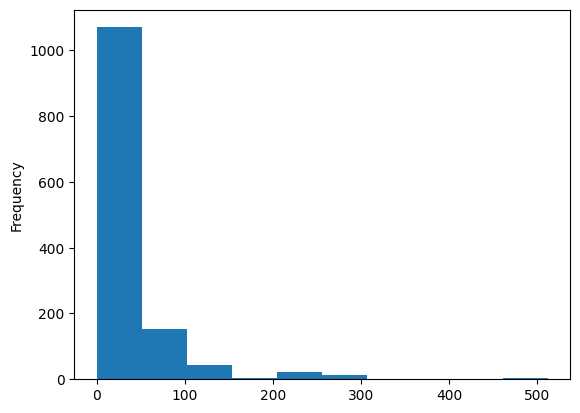

In [57]:
df["fare"].plot(kind="hist")

<Axes: ylabel='Density'>

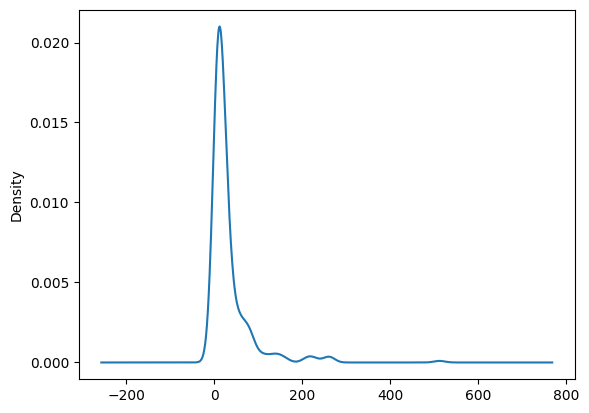

In [58]:
df["fare"].plot(kind="kde")